# OpenCV教程

## 软件安装

In [44]:
# 导入魔法命令
%run helper.py

# 内联图片
%matplotlib inline

In [2]:
print(cv.__version__)

4.7.0

下面执行摄像头打开
```shell
ls /dev/video*
```
查看设备号

如果打开失败,linux上可能是权限的问题,

```shell
sudo usermod -a -G video $USER
```

## 数据捕获

In [3]:
# 打开摄像头获取数据
cap = cv.VideoCapture(0)

# 执行数据捕获
while(1):
    # 获取一帧数据
    ret, frame = cap.read()
    break
cap.release()

# 此时可以直接将上面的操作整理到魔术方法
# 最终的版本位于helper.py的文件中

In [4]:
# 打开摄像头获取数据
cap = cv.VideoCapture(0)

# 执行数据捕获
while(1):
    # 获取一帧数据
    ret, frame = cap.read()
    
    # 打印frame内容
    print(frame)
    
    break
cap.release()

[[[34 29 23]
  [32 27 21]
  [33 28 22]
  ...
  [ 0  1  2]
  [ 0  1  2]
  [ 0  1  2]]

 [[30 27 21]
  [30 27 21]
  [30 27 21]
  ...
  [ 0  1  2]
  [ 0  2  0]
  [ 0  2  0]]

 [[33 31 24]
  [31 28 22]
  [34 33 24]
  ...
  [ 0  1  2]
  [ 0  2  0]
  [ 0  2  0]]

 ...

 [[20 25  9]
  [20 25  9]
  [20 25 10]
  ...
  [ 0  0  6]
  [ 0  0  6]
  [ 0  0  6]]

 [[20 26  7]
  [23 30 11]
  [20 25  9]
  ...
  [ 0  0  6]
  [ 0  0  6]
  [ 0  0  6]]

 [[22 29  9]
  [22 29  9]
  [24 28  9]
  ...
  [ 0  0  6]
  [ 0  0  6]
  [ 0  0  6]]]

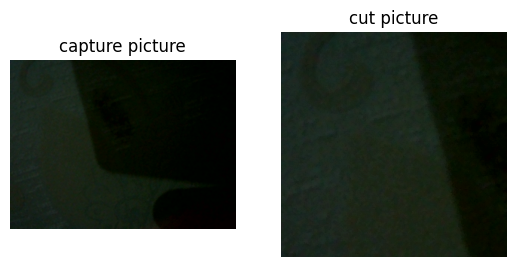

In [5]:
# 打开摄像头获取一帧数据
rawFrame = getFrame()
    
# 截取部分数据
cutFrame = rawFrame[0:300, 0:300]

frame = [rawFrame, cutFrame]
title = ['capture picture', 'cut picture']

display2Frame(frame, title)

In [6]:
# 颜色通道提取
frame = getFrame()

b, g, r = cv.split(frame)
print("blue", b)
print("green", g)
print("red", r)

print("blue", b.shape)
print("green", g.shape)
print("red", r.shape)

# 合并RGB
frame = cv.merge((b, g, r))

blue [[27 27 29 ...  0  0  0]
 [31 28 33 ...  0  0  0]
 [31 29 31 ...  0  0  0]
 ...
 [20 20 20 ...  0  0  0]
 [22 21 20 ...  0  0  0]
 [22 22 22 ...  0  0  0]]

green [[31 31 33 ...  4  4  4]
 [33 29 35 ...  4  4  4]
 [34 31 33 ...  4  4  4]
 ...
 [28 28 28 ...  0  0  0]
 [28 27 27 ...  0  0  0]
 [28 28 27 ...  0  0  0]]

red [[19 19 21 ...  0  0  0]
 [21 18 23 ...  0  0  0]
 [20 17 21 ...  0  0  0]
 ...
 [11 11 11 ...  5  5  5]
 [11 10 13 ...  5  5  5]
 [11 11 13 ...  5  5  5]]

blue
(480, 640)

green
(480, 640)

red
(480, 640)

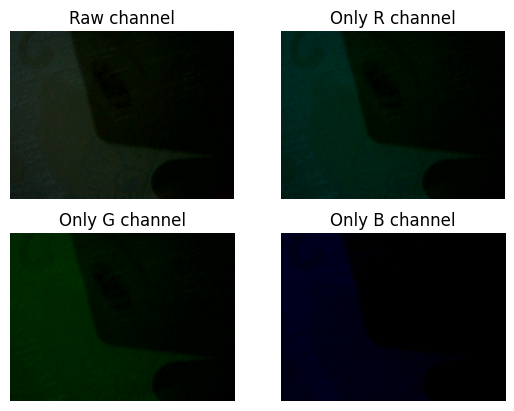

In [7]:
# 只保留某一个通道

# 打开原始文件
rawFrame = getFrame()

# 1. 只保留R通道
redImage = rawFrame.copy()
# redImage[:,:,0] = 0 
# redImage[:,:,1] = 0
redImage[:,:,2] = 0

# 2. 只保留G通道
greenImage = rawFrame.copy()
greenImage[:,:,0] = 0
#greenImage[:,:,1] = 0
greenImage[:,:,2] = 0

# 3. 只保留B通道
blueImage = rawFrame.copy()
#blueImage[:,:,0] = 0
blueImage[:,:,1] = 0
blueImage[:,:,2] = 0

display4Frame([rawFrame, redImage, greenImage, blueImage], ['Raw channel', 'Only R channel', 'Only G channel', 'Only B channel'])

## 边界填充

边界填充使用的函数`copyMakeBorder`


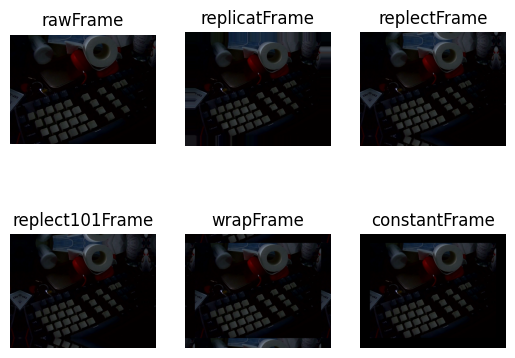

In [10]:
# 获取一帧原始数据
rawFrame = getFrame()

# 执行边界填充
size = (50, 50, 50, 50)

# 复制法
replicatFrame = cv.copyMakeBorder(rawFrame, size[0], size[1], size[2], size[3], cv.BORDER_REPLICATE)

# 反射法
replectFrame = cv.copyMakeBorder(rawFrame, size[0], size[1], size[2], size[3], cv.BORDER_REFLECT)

# 反射101
replect101Frame = cv.copyMakeBorder(rawFrame, size[0], size[1], size[2], size[3], cv.BORDER_REFLECT_101)

# 外包装
wrapFrame = cv.copyMakeBorder(rawFrame, size[0], size[1], size[2], size[3], cv.BORDER_WRAP)

# 常量法
constantFrame = cv.copyMakeBorder(rawFrame, size[0], size[1], size[2], size[3], cv.BORDER_CONSTANT)

display6Frame([rawFrame, replicatFrame, replectFrame, replect101Frame, wrapFrame, constantFrame], 
             ['rawFrame', 'replicatFrame', 'replectFrame', 'replect101Frame', 'wrapFrame', 'constantFrame'])

## 数据计算

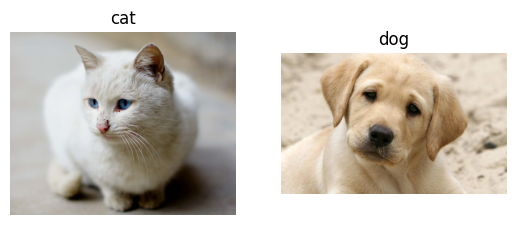

In [17]:
# 加载图片
img_cat = cv.imread("pic/cat.jpg")
img_dog = cv.imread("pic/dog.jpg")

# 执行显示
display2Frame([img_cat, img_dog], ["cat", "dog"])

[[196 196 196 ... 134 134 135]
 [196 196 196 ... 134 134 134]
 [196 196 196 ... 134 134 134]
 [196 196 196 ... 134 134 133]
 [196 196 196 ... 134 133 133]]

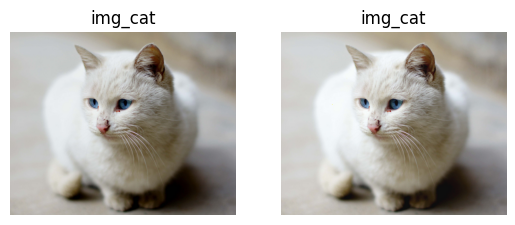

In [25]:
# 图片加数
img_cat2 = img_cat + 12
print(img_cat2[:5, :, 0])   # 开始行:结束行, 开始列:结束列, 通道
display2Frame([img_cat, img_cat2], ["img_cat", "img_cat"])

In [37]:
# 直接相加,此时肯定发生了溢出
(img_cat + img_cat)[:5, :, 0] # % 256

array([[112, 112, 112, ..., 244, 244, 246],
       [112, 112, 112, ..., 244, 244, 244],
       [112, 112, 112, ..., 244, 244, 244],
       [112, 112, 112, ..., 244, 244, 242],
       [112, 112, 112, ..., 244, 242, 242]], dtype=uint8)

In [28]:
# 操纵函数,发生溢出则保存最大值
cv.add(img_cat, img_cat)[:5, :, 0]

array([[255, 255, 255, ..., 244, 244, 246],
       [255, 255, 255, ..., 244, 244, 244],
       [255, 255, 255, ..., 244, 244, 244],
       [255, 255, 255, ..., 244, 244, 242],
       [255, 255, 255, ..., 244, 242, 242]], dtype=uint8)

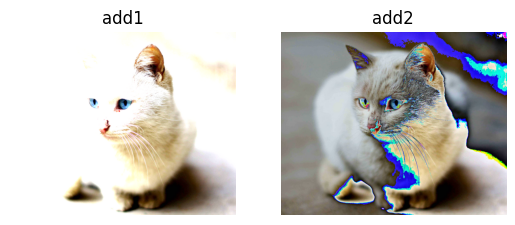

In [29]:
# 展示一下情况
display2Frame([cv.add(img_cat, img_cat), (img_cat + img_cat)], ["add1", "add2"])

## 图像融合

In [34]:
# 直接相加是会发生异常的, 需要resize
print("cat shape", img_cat.shape)
print("dog shape", img_dog.shape)

cat shape
(1609, 1982, 3)

dog shape
(797, 1275, 3)

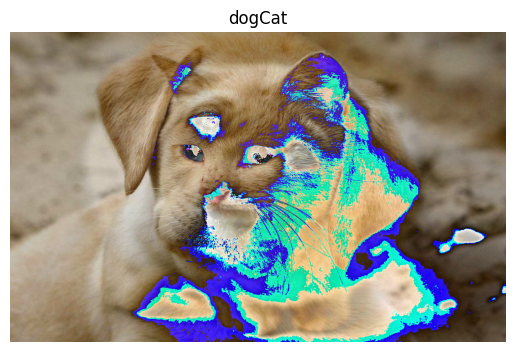

In [40]:
displayFrame(cv.resize(img_cat, (1275, 797)) + img_dog, "dogCat")

## 图像阈值

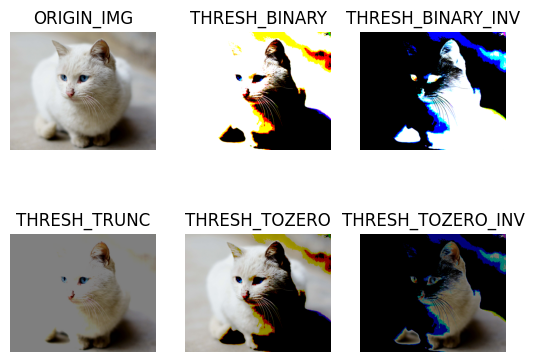

In [45]:
# 阈值操作
ret, threshold1 = cv.threshold(img_cat, 127, 255, cv.THRESH_BINARY)
ret, threshold2 = cv.threshold(img_cat, 127, 255, cv.THRESH_BINARY_INV)
ret, threshold3 = cv.threshold(img_cat, 127, 255, cv.THRESH_TRUNC)
ret, threshold4 = cv.threshold(img_cat, 127, 255, cv.THRESH_TOZERO)
ret, threshold5 = cv.threshold(img_cat, 127, 255, cv.THRESH_TOZERO_INV)

display6Frame([img_cat, threshold1, threshold2, threshold3, threshold4, threshold5], 
              ["ORIGIN_IMG", "THRESH_BINARY", "THRESH_BINARY_INV", "THRESH_TRUNC", "THRESH_TOZERO", "THRESH_TOZERO_INV"])

## 图像平滑处理